<a href="https://colab.research.google.com/github/WizardOfPitty/Computational-Methods-in-Physics/blob/main/Machine_Learning_Workflow/0_1_machine_learning_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/GDS-Education-Community-of-Practice/DSECOP/blob/main/Machine_Learning_Workflow/0_1_machine_learning_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Introduction to the Machine Learning Workflow with Linear Regression

Author: Julie Butler

Date Created: October 4, 2022

Last Modified: November 7, 2022

Notebook 1/5 of the DSECOP Module: An Introduction to the Machine Learning Workflow with Linear Regression.  See the entire module [here]().

## What is Machine Learning?

Machine learning is the field that occurs when artificial intelligence is applied to data science; it is using computer algorithms that learn to draw knowledge from data sets.  To use another definition, machine learning is a set of algorithms which learn to perform a task by considering examples of what is to be done, but without being given explicit instructions.  Machine learning algortihms learn what to do by finding patterns in the data that are correlated to the problem to be solved.

Machine learning algorithms can be split up in two ways, either based on the type of problem or the type of data set.  The first way to classify machine learning algorithms is based on the problem type.  If we are trying to classify data into a set number of categories, then the machine learning algorithm is performing _classification_.  If instead we are training the algorithm on a data set where the output could be any number then these machine learning algorithms are performing _regression_.

The other way to classify machine learning algorithms is by the type of data.  If the data set has both an x and a y component, then a _supervised_ machine learning algorithm will learn how to connnect each y value with its corresponding x value.  We call data sets that have x and y components _labelled_ data.  If instead we were only given the y component of a data set, i.e. _unlabelled_ data, then _unsupervised_ machine learning algorithms attempt to determine patterns without knowing the x components.  There is a third category of machine learning algorithms called _reinforcement_ learning which is popular in fields such as robotics.

There are many great resources on machine learning, but a few for further investigation are listed below.
* [_Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition_](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) by Aurélien Géron
* [Scikit-Learn's User Guide](https://scikit-learn.org/stable/user_guide.html)
* [Machine Learning Mastery](https://machinelearningmastery.com) by Jason Brownlee
* [A.I. Wiki](https://wiki.pathmind.com)

## Linear Regression: A Simple Machine Learning Algorithm

Linear regression is one of the most basic machine learning algorithms, but it still contains all of the basic ingredients present in more complicated machine learning algorithms such as neural networks. Because of this many machine learning courses and books start off with a study of linear regression.

Linear regression also has a few other benefits such as analytical expressions for its weights (described in a few cells) and it has a direct link to statistics as many statistics classes also cover linear regression.  Many machine learning packages, such as Scikit-Learn, provide easy to use implementations of linear regression but it is also not difficult to implement linear regression from scratch (the bonus problem of this notebook).

However, due to the algorithms simplicity, many machine learning practicioners overlook it in favor of more complicated (and popular) machine learning algorithms.  However, we will see that linear regression can be a very powerful too, especially with a few modifications.

### The Linear Regression Algorithm

Given a data set (**X**, **y**), the linear regression algorithm makes the simple assumption that the data set it is trying to model, y, can be approximated by multiplying the input/dependent data, X, by a set of weights, $\theta$:

<br>

$$\hat{y}_{Linear} = X\theta,$$


<br>

where $\hat{y}$ is the output of the linear regression algorithm ($\hat{y}$ is typically used to denote a machine learning prediction, regardless of the algorithm).  X can either be a vector or a matrix depending on how many features are needed and $\theta$ is either a scalar (if X is a vector) or a vector (if X is a matrix).

The machine learning part of linear regression comes when the value of $\theta$ is found such that the predicted data points ($\hat{y}$) are as close as possible to the known data points (y).

### Linear Regression Loss Function

In machine learning, a loss function measures the error in the algorithm's prediction from the true data. The loss function for the linear regressison algorithm is the mean-squared error function (y = y$_{True}$ and $\hat{y}$ = $\hat{y}_{Linear}$):

$$J(\theta) = \frac{1}{n}\sum_{i=0}^{n-1} (\hat{y}_i - y_i)^2$$

The goal of the linear regression algorithm is to find values of $\theta$ which minimize the loss function (meaning that the predicted and true results will be as soon as possible).
We can find the best values of $\theta$ using a simple optimization:

$$\frac{\partial J(\theta}{\partial \theta} = 0.$$

If we rewrite the loss function in terms of matrices and vectors:

$$J(\theta) = \frac{1}{n}[(y-X\theta)(y-X\theta)],$$

then we can solve the optimization probelm for $\theta$, yielding:

$$\theta = (X^TX)^{-1}X^Ty.$$





### Uses of Linear Regression

Though linear regression is considered a simple machine learning model, we will see by the end of this notebook that some minor modifications can greatly extend the range of problems linear regression can be applied to.

## The Machine Learning Workflow

Though every machine learning problem will use a different algorithm and data set, the analysis shares the same five steps:

1. Importing your data set and formatting it
2. Splitting the data into a training set and a test set
3. Training your machine learning model with the training set
4. Evaluate the trained model's performance with the test set
5. (Optional) Make improvements to your model to increase its performance

For the remainder of this notebook we will see how these steps can be combined with linear regression to create a machine learning workflow that can be transferred to much more complicated problems.

## Applying the Machine Learning Workflow to Linear Regression

Before we begin we need to import the various libraries and packages that will be needed.  These include NumPy, Matplotlib, Pandas, and Scikit-Learn.  If you are using Google Colab to run these notebooks all of these package are already installed.  If you are using Jupyter notebooks on your own computer, check to make sure you have these packages installed before running this cell.

In [ ]:
##############################
##          IMPORTS         ##
##############################
# Needed for arrays and mathematical functions
import numpy as np
# For plotting
import matplotlib.pyplot as plt
# For importing and formatting data sets
import pandas as pd
# For the machine learning section, their functions will be
# explained later in the notebook
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Next, if you are running this notebook on Google Colab we need to set things up so that the data files on your Drive can be accessed.  If you are running this notebook using Jupyter notebooks, skip running this cell.

In [ ]:
# GOOGLE DRIVE SET UP
from google.colab import drive
# Mount my Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Directory to retrieve data files from (###CHANGE THIS###)
data_dir = '/content/gdrive/My Drive/Teaching/DSECOP/Module 2: Workflow/'

Now, we need set a file path so the notebook knows where to save and read data from.  This will be the file path where the notebooks from this module are stored.

### IMPORTANT!

**PROBLEM 1:** Change the below line of code to reflect where you have this files for this module stored on your Google Drive or on your computer.  It is important that you start from the very top folder and work your way down the the folder where these files are stored.

In [84]:
# Directory to retrieve data files from (###CHANGE THIS###)
data_dir = '/content/gdrive/My Drive/Comp_Methods/'

Let's generate data from a polynomial but with random noise added.  We do this to simulate a more realistic data set as in experiments there are often factors which influence the data and add noise that cannot be eliminated.

The noise is added to the data set by adding a random integer between -10 and 10 to each y value of the data set.  Since the average value of the y data set before the noise is added is 94.8 and the maximum y value is 328.62, adding this noise does not change the shape of the data set drastically.  Later in the notebook you will explore how varying the amount of noise effects the machine learning model.

In [74]:
# Generate a range of x values and the corresponding y values
# for a polynomial data set
x = np.arange(-10,10,0.1)
y = 3*x**2 + 4*x - 5

# Add noise to the data set by adding a random integer to each
# y value. The random integers will be between -10 and 10.
noise = 1
y = y + np.random.randint(-1*noise,noise,len(y))

Let's plot the data set to see how it looks.  Note we add labels to the x and y axes.  In the sciences it is important to always label the axes with the name of the data and units in applicable.

Text(0, 0.5, 'y')

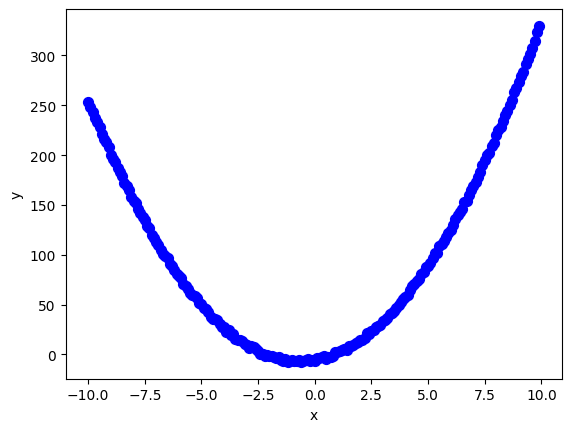

In [63]:
# Plot the data set and label the x and y axes
plt.scatter(x,y, color="blue", s=50)
plt.xlabel("x")
plt.ylabel("y")

Finally, we format the data into columns of an array and save it as a comma separated file (.csv) with headings for each column.

In [ ]:
# Make an NumPy array where each row corresponds to one (x,y) point in the data set
data_notebook_1 = np.array([x,y]).T

# Save the data set as a .csv file, add header labels to the two columns
pd.DataFrame(data_notebook_1).to_csv(data_dir+"data_notebook_1.csv", header=['x','y'],\
                                     index=False)

### Importing and Formatting Data with Pandas

For many machine learning problems you will be working with a data set that has been gathered or generated previously and has been stored in a file.  A common way to import saved data into a Python program is using a library called Pandas.  When you import data from a file using Pandas it enters the program in a structure called a Pandas dataframe.  Dataframes have many nice feature for displaying and accessing data.

Let's use the Pandas function `read_csv` to import the data set we created above as a data frame.  Then let's print the first few lines of the dataframe as a table to make sure everything has imported correctly.

In [ ]:
# Import the data set using Pandas.  The data set will now be formatted as a Pandas
# dataframe
data_set = pd.read_csv(data_dir+"data_notebook_1.csv",header=0)

# Print the first few rows of the dataframe
data_set.head()

,x,y
0,-10.0,263.00
1,-9.9,249.43
2,-9.8,249.92
3,-9.7,245.47
4,-9.6,236.08


Using a Pandas dataframe makes it very easy to access the individual columns. A Pandas dataframe works like a Python dictionary, with the names of each column being the keys of the dictionary.  The entry for each key is the column of data the label corresponds to.  For example, we can access the data in the first column, x, using the following code.

In [ ]:
# Print the column of the dataframe that corresponds to the column label 'x'
data_set['x']

0     -10.0
1      -9.9
2      -9.8
3      -9.7
4      -9.6
       ... 
195     9.5
196     9.6
197     9.7
198     9.8
199     9.9
Name: x, Length: 200, dtype: float64

It is also possible to extract individual data points from a column using array indexing.  The first data point in the x data set can be accessed using the below code.

In [ ]:
# Extract the first point in the x data set
data_set['x'][0]

-10.0

**PROBLEM 2:** In the below code cell, print the y column of the data set.  On the next line print the 10th element of the y data set (remember that array indexing starts from 0).

Though Pandas dataframes are convinient for displaying data, many machine learning packges require the data set to be split into two separate NumPy arrays, one for the x component of the data set and one for the y component of the data set.  Luckily, there is a NumPy function called `asarray` which will convert the columns of the dataframe into NumPy arrays.

In [ ]:
# Convert the columns of the Pandas dataframe to NumPy arrays to more
# easily manipulate the data
X = np.asarray(data_set['x'])
y = np.asarray(data_set['y'])

### Training and Test Data Sets with Scikit-Learn

The most common way to perform a training/test split is to use the function form the Scikit-Learn library called `training_test_split`.  In general this function takes three arguments: the x component of the dat set, the y component of the data set, and a number between 0.0 and 1.0 called `test_size`.  This number dictates the fraction of the data set which is to be used as the test set.  In this case, 20% of the overall data set will be devoted to the test set.  The `training_test_split` randomly splits the data between the training and test sets.

The function returns 4 data sets as NumPy arrays, in order: the x component of the training set, the x component of the test set, the y component of the training set, and the y component of the test set.

Below we will use `train_test_split` to create our training and test data sets.

In [ ]:
# Using the Scikit-Learn package, split the data set into a training set and a
# test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Let's graph the training and test data sets on the same graph to see if the training data set seems like it will be a good representation of the test data set.

Text(0, 0.5, 'y')

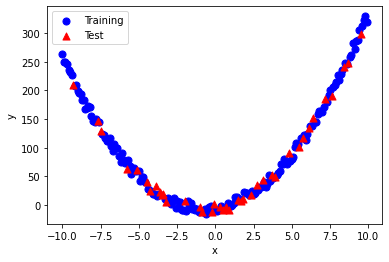

In [ ]:
# Plot the training data and the test data on the same plot
plt.scatter(X_train, y_train, color='blue', s=50, label="Training")
plt.scatter(X_test, y_test, color='red', marker='^',s=50, label="Test")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

**PROBLEM 3:** Does the test data set appear to be a good representation of the total data set?  Do you notice a difference if you run the `train_test_split` cell and the graphing cell again? Explain your answer in the text cell below.

### Linear Regression with Scikit-Learn

First, we must reshape the x components of the training and test data sets.  Machine learning algorithms that are provided by Scikit-Learn (and other machine learning libraries like Keras) require the data to have specific shapes.  For an x data set which only has one dimension (i.e. one x value for each y value), it will need to reshaped like this:

In [34]:
# Reshape the x components of the data sets to meet Scikit-Learn's
# specifications
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

The next is to define the linear regression algorithm using Scikit-Learn's package and then train the linear regression algorithm with the training data.  Scikit-Learn makes it very easy, only requiring two lines of code.  Here we have set the argument `fit_intercept` to False when defining the linear regression algorithm.  This will be explained later in the notebook.

In [35]:
# Define the linear regression algorithm and train it using the training data
LiR = LinearRegression(fit_intercept=False)
LiR.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

Finally, we will used the train linear regression model to predict the y values that correspond to the x values in the test data set.  We will store the results in the NumPy array `y_pred` to be compared to `y_test` in the next section.

In [36]:
# Used the trained algorithm to predict what y values correspond to the x component of
# the test data set
y_pred = LiR.predict(X_test)

### Evaluating Model Performance with NumPy and Matplotlib

After the test data set has been evaluated using the trained model, the next step in the machine learning workflow is to evaluate its performance.  We will do this by comparing the known y data points (stored in `y_test`) to the y data points that have been predicted by the trained linear regression algorithm (stored in `y_pred`).

One common measure of error used in machine learning workflows is called the mean-squared error (MSE), which can be defined in equation form as:

$$MSE(y_{test}, \hat{y}_{pred}) = \frac{1}{N}\sum_{i=1}^N (y_{test,i} - \hat{y}_{pred,i})^2,$$

where N is the number of data points, $y_{test}$ are the known data points (stored in `y_test`), and $\hat{y}_{pred}$ are the predicted data points (stored in `y_pred`).  Conceptually we can think if the MSE as the average error of each predicted data point, squared.

In Python, we can make use of the library NumPy to create a function that calculates the MSE between two NumPy arrays.  This is shown below in the next code cell.

**PROBLEM 4:** Go through the below code cell and make sure you understand how it related to the MSE equation given above.  Create new code cells below it to examine it performance if needed.

In [38]:
##############################
##            MSE           ##
##############################
def mse(A, B):
    """
        Inputs:
            A,B: NumPy arrays of the same length
        Returns:
            Unnamed: the mean-squared error between A and B
        Calculates and returns the mean-squared error between the given Numpy arrays.
        Note that A and B must be the same length.
    """
    return np.average((A-B)**2)

Let's print the MSE between the known data points, `y_test`, and the predicted data points, `y_pred`.

In [39]:
print("The MSE between the test data set and the predicted data set is:",\
      mse(y_pred, y_test))

The MSE between the test data set and the predicted data set is: 10744.221672592865


The smaller the MSE is the closer the known data set matches the predicted data set.  However, if the values in the data set are quite large then even comparatively small deviations in values can results in a large MSE error.  Sometimes an easier to understand metric is the root mean-squared error (RMSE), which is simply defined as the square root of the MSE:

$$RMSE(y_{test}, \hat{y}_{pred}) = \sqrt{\frac{1}{N}\sum_{i=1}^N (y_{test,i} - \hat{y}_{pred,i})^2}.$$

Conceptually we can think of this metric as the average error each of the predicted data points has.

We can print the RMSE for our machine learning algorithm simply by taking the square root of the MSE.

In [40]:
print("The RMSE between the test data set and the predicted data set is:",\
      np.sqrt(mse(y_pred, y_test)))

The RMSE between the test data set and the predicted data set is: 103.65433745190244


This RMSE score is still quite large, especially if we compare it to the average value of the y data set.

In [41]:
print("The average value of the y data set is:", np.average(y))

The average value of the y data set is: 94.98999999999916


The exact error and average of the data set will change each time you run the notebook since the noise addition and train/test split are randomized, but you should see that the RMSE error is equivalent if not larger than the average value of the y data set.

Finally, let's graph the known data set and the predicted data set on the same graph to see how they compare.

Text(0, 0.5, 'y')

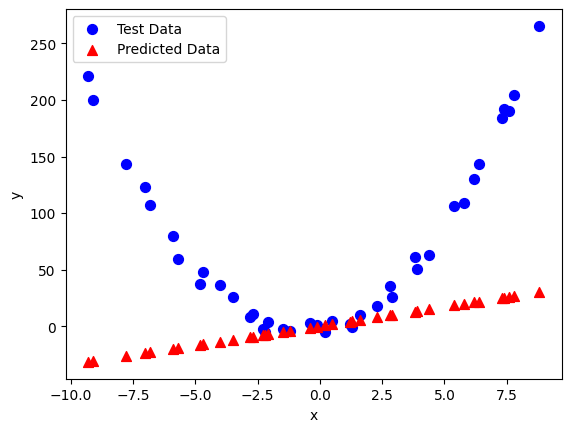

In [42]:
# Plot the test data set and the predicted data set on the same graph
plt.scatter(X_test, y_test, color="blue", s=50, label="Test Data")
plt.scatter(X_test, y_pred, color='red', marker='^', s=50, label="Predicted Data")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

**PROBLEM 5:** Does the model appear to be a good match for the data set? Do the predictions from the linear regression algorithm make since? How could the model be improved?  Explain your answer in the text cell below.

The model is a poor fit for the data set, becuase the data is quadratic while our fit is linear. These predictions do not much sense as we move away from x = 0. We could use a quadratic fit function instead or fashion a design matrix.

### Improve the Model's Performance: Design Matrices

If we analyze a bit closer how the linear regression algorithm works, it should be unsurprising that it failed to fit a quadaratic data set.  If we take the form of the output for an unmodified linear regression algorithm:

$$\hat{y} =  X\theta,$$

and expand it, remembering that $\hat{y}$ and X are vectors and $\theta$ is a number, we get:

$$y =  X\theta \longrightarrow \begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
. \\
. \\
. \\
y_N
\end{bmatrix} =  \begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
. \\
. \\
. \\
x_N \\
\end{bmatrix}\theta \longrightarrow \begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
. \\
. \\
. \\
y_N
\end{bmatrix} =  \begin{bmatrix}
\theta x_1 \\
\theta x_2 \\
\theta x_3 \\
. \\
. \\
. \\
\theta x_N \\
\end{bmatrix}.$$

This means that without any modifications, the best model a linear regression algorithm can create is that the each output is just the corresponding input times a constant, $\theta$ ($y_1 = \theta x_1, y_2 = \theta x_2, y_3 = \theta x_3, ...$).  However there is an easy way to extend the amount of problems linear regression can be applied to by using some knowledge of the data set at hand and a structure called a _design matrix_.

To create a design matrix we simply add more columns of X so that when we expand $\hat{y} = \theta X$, it better matches the form we expect our data to have.  Since we created our data set we know it is a quadratic and has the form $y = ax^2 + bx + c$, therefore let us consider the following way to restructure X.  Here we will make $\theta$ a vector instead of a scalar and X will be a matrix instead of a vector:

$$y =  X\theta \longrightarrow \begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
. \\
. \\
. \\
y_N
\end{bmatrix} =  \begin{bmatrix}
x_1^2 & x_1 & 1\\
x_2^ 2 & x_2 & 1 \\
x_3^2 & x_3 & 1 \\
. \\
. \\
. \\
x_N^2 & x_N & 1 \\
\end{bmatrix}\begin{bmatrix}
\theta_1
\theta_2
\theta_3
\end{bmatrix} \longrightarrow \begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
. \\
. \\
. \\
y_N
\end{bmatrix} = \begin{bmatrix}
\theta_1 x_1^2 & \theta_2 x_1 & \theta_3\\
\theta_1 x_2^ 2 & \theta_2 x_2 & \theta_3 \\
\theta_1 x_3^2 & \theta_2 x_3 & \theta_3 \\
. \\
. \\
. \\
\theta_1 x_N^2 & \theta_2 x_N & \theta_3 \\
\end{bmatrix}.$$


Here each point in the y data set corresponds to a quaratic form of the x data set, which should match our data set.  If we did not have prior knowledge about what our data set was, we could always graph it and see if we could gleam any insights from its shape or use the [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix).

Computationally we can construct the design matrix using the following code.

In [75]:
# Create an array that is the X comoponent of the data set squared and an array that is
# just ones
X_squared = X**2
ones = np.ones(len(X))

# Create an array such that each row is [x**2, x, 1], for each point in the x data set
X_design_matrix = np.array([X_squared, X, ones]).T

# Print the first 10 rows of this new X data set
print(X_design_matrix[:10])

[[100.   -10.     1.  ]
 [ 98.01  -9.9    1.  ]
 [ 96.04  -9.8    1.  ]
 [ 94.09  -9.7    1.  ]
 [ 92.16  -9.6    1.  ]
 [ 90.25  -9.5    1.  ]
 [ 88.36  -9.4    1.  ]
 [ 86.49  -9.3    1.  ]
 [ 84.64  -9.2    1.  ]
 [ 82.81  -9.1    1.  ]]


**PROBLEM 6:** Make sure the above code makes sense to you before moving on.  Print out different lines if you need to.

It makes sense and I will, hopefully, not regret this claim.

In [76]:
# Using the Scikit-Learn package, split the data set into a training set and a
# test set
X_train, X_test, y_train, y_test = train_test_split(X_design_matrix, y, test_size=0.2)

Since this X data set is two dimensional (multiple x values per y value), there is no need to reshape the X components of the data sets before performing linear regression with Scikit-Learn.  Here we create our linear regression algorithm and train it with the training data.  We set `fit_intercept` to False because we have already included the intercept in our design matrix (the column of ones).  Let's also go ahead and predict the points that will be in our test set.

In [77]:
# Define the linear regression algorithm and train it using the training data
# When using a design matrix, make sure the linear regression algorithm is not
# automatically fitting the intercept of the graph
LiR = LinearRegression(fit_intercept=False)
LiR.fit(X_train, y_train)

# Used the trained algorithm to predict what y values correspond to the x component of
# the test data set
y_pred = LiR.predict(X_test)

Now we need to evaluate our model's performance using the test data set.  We will do this the same was as before, by calculating the MSE and RMSE and comparing those values to the average y values of the test data set.  We will also graph the known data points and the preducted data points on the same graph.

In [78]:
print("The MSE between the test data set and the predicted data set is:",\
      mse(y_pred, y_test))

The MSE between the test data set and the predicted data set is: 0.2527584020767466


In [79]:
print("The RMSE between the test data set and the predicted data set is:",\
      np.sqrt(mse(y_pred, y_test)))

The RMSE between the test data set and the predicted data set is: 0.5027508349836394


In [80]:
print("The average value of the y data set is:", np.average(y))

The average value of the y data set is: 94.30999999999916


Text(0, 0.5, 'y')

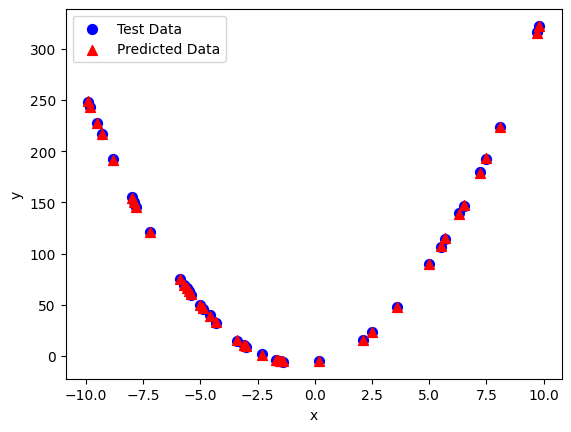

In [81]:
# Plot the test data set and the predicted data set on the same graph
plt.scatter(X_test[:,1], y_test, color="blue", s=50, label="Test Data")
plt.scatter(X_test[:,1], y_pred, color='red', marker='^', s=50, label="Predicted Data")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

**PROBLEM 7:** Does this new model seem to be a better fit for the data set?  Explain your answer using a combination of the error scores and the graph.

With our previous model the RMSE value was greater than the average y value of the data set; however, after implementing the design matrix our RMSE is an order of magnitude lower, indicating a superior fit. Upon plotting the test data vs predicted we find that the two data sets visually overlap quite well.

### Evaluating the Model Weights

Another method of evaluating the performance of our model is to look at the weights, $\theta$, that were calculated when the model was trained.  We can get this easily using the name of our linear regression algorith, `LiR`, and the attribute `coef_`.

In [82]:
# Print the coefficients of the linear regression algorithms
LiR.coef_

array([ 2.9998784 ,  4.00167591, -5.47791018])

Since we created the data set in this notebook, we know that before we added the noise the data set had the form $y = 3x^2 + 4x -5$.  Therefore, assuming the noise added was not too great, the weights found by the linear regression algorithm should be $a \approx 3$, $b \approx 4$, and $c \approx -5$.

We can print the weights of the linear regression algorithm below, along with the actual values to see how they compare.

In [71]:
print("Predicted Value of a:", LiR.coef_[0],"  Actual Value of a: 3")
print("Predicted Value of b:", LiR.coef_[1],"  Actual Value of b: 4")
print("Predicted Value of c:", LiR.coef_[2],"  Actual Value of c: -5")

Predicted Value of a: 2.998982721274834   Actual Value of a: 3
Predicted Value of b: 3.9834878281017887   Actual Value of b: 4
Predicted Value of c: -5.47707650003805   Actual Value of c: -5


**PROBLEM 8:** How do the predicted values of a, b, and c compare to the actual values?  Do you think this is a good measure of the accuracy of the model?

Each of the predicted values differs from the actual value by less than ten percent, which is a standard cutoff when we are not being rigorous. I don't think this is a good way to measure the accuracy of a model, because in the real world our data may not follow such a simple pattern. In cases where we do have an idea of what to expect before hand this can be a helpful addition to our cross validation toolbox.

**PROBLEM 9:** Rerun the above code cells (From the heading *Applying the Machine Learning Workflow to Linear Regression*) with various levels of noise. (Hint: you only need to change one number)  How does the level of noise effect the accuracy of the model?  Is it possible to have no error from the linear regression algorithm?  Type your observations in the text cell below.

The more noise there is in the data set, the greater the error in the model output will be. All data has noise; so, it is not possible to have zero error in a model.

### Practice What You Have Learned

a. In the code cell below, import the file `practice_what_you_have_learned_1.csv` as a Pandas dataframe.  Print the first few lines of the dataframe and the keys.  Hint: see [this page](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) for documentation on Pandas dataframes.

In [86]:
Pdata = pd.read_csv(data_dir+"practice_what_you_have_learned_1.csv")
print(Pdata.head())
print(Pdata.keys())

      x         y
0 -10.0 -6355.000
1  -9.9 -6222.353
2  -9.8 -5700.784
3  -9.7 -5807.251
4  -9.6 -5542.712
Index(['x', 'y'], dtype='object')


b. Export the columns of the dataframe as NumPy arrays, using descriptive variable names based on the names of the columns.

In [ ]:
x = np.asarray(Pdata['x'])
y = np.asarray(Pdata['y'])

c. Graph the data set (assuming the first column of the data set is the x-axis and the second column is the y-axis).  Add x and y labels to the axes based on the column names given in the data set.

Text(0, 0.5, 'y')

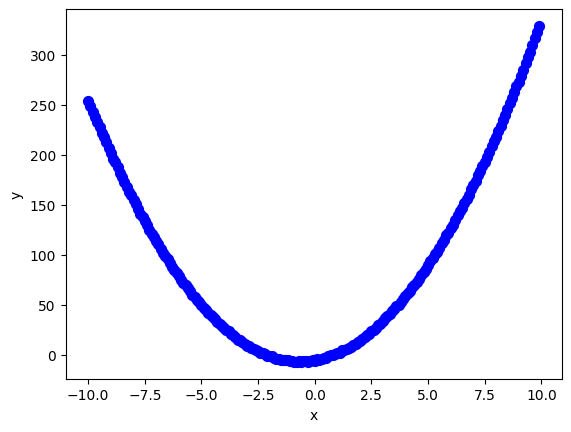

In [87]:
plt.scatter(x,y, color="blue", s=50)
plt.xlabel("x")
plt.ylabel("y")

d. Based on the graph of the data, what equation could be a good model for the data?  Write your answer in the cell below.  Hint: the answer will be a polynomial.

ax**2 + bx + c

e. Create a design matrix using your answer to part d.

In [88]:
xsqd = x**2
ones = np.ones(len(x))
X_design_matrix = np.array([xsqd, x, ones]).T
print(X_design_matrix[:10])

[[100.   -10.     1.  ]
 [ 98.01  -9.9    1.  ]
 [ 96.04  -9.8    1.  ]
 [ 94.09  -9.7    1.  ]
 [ 92.16  -9.6    1.  ]
 [ 90.25  -9.5    1.  ]
 [ 88.36  -9.4    1.  ]
 [ 86.49  -9.3    1.  ]
 [ 84.64  -9.2    1.  ]
 [ 82.81  -9.1    1.  ]]


f. Create a training data set and a test data set using the Scikit-Learn function.  Set aside 25% of the data set for the test data set.

In [89]:
x_trn, x_tst, y_trn, y_tst = train_test_split(X_design_matrix, y, test_size=0.25)

g. Create a linear regression model, fit it using the training data, and then create a variable `y_pred` which holds the predictions for the test data set.

In [ ]:
LR = LinearRegression(fit_intercept=False)
LR.fit(x_trn, y_trn)
y_pred = LR.predict(x_tst)

h. Using any combination of graphs and errors, determine the accuracy of your model using the test data set.

i. Do you think your machine learning model fits the data set well?  If it does not, what improvements do you think you can make to increase it performance?

## Bonus Problem: Creating a Linear Regression Algorithm from Scratch

Using the equation for the optimized parameters of $\theta$, presented earlier in this notebook, create a function which performs linear regression on a given training data set and returns a prediction for a test set.  Combine your code into a function called `linear_regression`, which takes three parameters `X_train`, `y_train`, and `X_test`, and returns the predicted y data set, `y_pred`.  Use the outline of the function given below.  Compare its performance using the "Practice What You Have Learned" data set and compare your function's performance to the


```python
def linear_regression (X_train, y_train, X_test):
    # Your code goes here
    return y_pred
```